# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

### Components

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [1]:
# Your code/answer goes here.

How big is the state space? Give an estimate and explain it.

In [2]:
# Your code/ answer goes here.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [3]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary where `n` and `m` represents the number of dots horizontaly and vertically, respectively. Everybody needs to use the same representation so we can let agents play against each other later. 

### Board Functions

In [4]:
# import tensorflow as tf

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)

In [5]:
def emptyN(n):
    return {
            'n': n,  ### hoizontal dots
            'm': n,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }
def empty4():
    return {
            'n': 4,  ### hoizontal dots
            'm': 4,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }
def empty3():
    return {
            'n': 3,  ### hoizontal dots
            'm': 3,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }
def empty2():
    return {
            'n': 2,  ### hoizontal dots
            'm': 2,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }

def draw_line(board, orientation, row, col, player):
    """
    Place a line on an exiting board. 
    Also checks if that line closed a box and adds point to whoever scored.
       
    Parameters
    ----------
    board: dict
        the board
    orientation: str
        either 'h' or 'v' for horizontal or vertical
    row, col: int
        index of the starting dot for the line (starting with 0)
    player: str
        Either -1 or +1, representing the player adding the line
    """
    if orientation not in ['h', 'v']:
        return False
    
    if player != -1 and player != 1:
        return False
        
    if row < 0 or col < 0:
        return False
        
    if row >= (board['n']+1) + (orientation == 'v') or col >= (board['m']+1) + (orientation == 'h'):
        return False
        
    if (orientation, row, col) in board:
        return False
    
    board[(orientation, row, col)] = True
    
    # Check if the line closes a box
    line = (orientation, row, col)
    
    # Go through all cases
    if line[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', line[1]+1, line[2]) in board and ('v', line[1]+1, line[2]+1) in board and ('h', line[1]+1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1]+1, line[2])] = player
            # (2,1): -1
        
        # Case 2: horizontal line at top
        if ('v', line[1], line[2]) in board and ('v', line[1], line[2]+1) in board and ('h', line[1]-1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2])] = player
    
    if line[0] == 'v':
        # Case 3: vertical line at left
        if ('h', line[1], line[2]) in board and ('v', line[1], line[2]+1) in board and ('h', line[1]-1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2])] = player
        
        # Case 4: vertical line at right
        if ('h', line[1], line[2]-1) in board and ('v', line[1], line[2]-1) in board and ('h', line[1]-1, line[2]-1) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2]-1)] = player
    
    return True

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def print_board(board):
    n = board['n']  # Rows
    m = board['m']  # Columns
    
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, m-0.5)
    ax.set_ylim(-0.5, n-0.5)
    
    # Draw dots
    for row in range(n):
        for col in range(m):
            if (row, col) in board:
                ax.scatter(row, col, s=100, marker='o', color='black')
            else:
                ax.scatter(row, col, s=100, marker='o', color='black')
     
    # Draw lines
    for line in board:
        # print(line)
        if line != 'n' and line != 'm' and line != -1 and line != 1:
            # print(line)
            if len(line) > 2:
                # Draw Horizontal line
                if line[0] == 'h':
                    l = mlines.Line2D([line[2]-1,line[2]], [line[1]-1,line[1]-1], color='black')
                    # l = mlines.Line2D([line[1],line[1]], [line[2],line[2]+1], color='black')
                    ax.add_line(l)
                # Draw Vertical line
                else:
                    l = mlines.Line2D([line[2]-1,line[2]-1], [line[1]-1,line[1]-2], color='black')
                    # l = mlines.Line2D([line[1],line[1]-1], [line[2],line[2]], color='black')
                    ax.add_line(l)
    
    # Check for boxes
    # Boxes are stored in board with (row, col) as key and player (1 or -1) as value
    # eg: board[(3, 1)] = 1 -> player 1 has a box with top left vertex at (3, 1)
    for box in board:
        if box != 'n' and box != 'm' and box != -1 and box != 1:
            if len(box) == 2:
                if board[(box[0], box[1])] == 1:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='b'))
                else:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='r'))
    
    # Print results   
    print('Results:')
    print('         -1:', board[-1])
    print('          1:', board[1])
    
    # Set up plot to start at (1, 1)
    x = []
    y = []
    for row in range(board['n']):
        # x.append(row)
        x.append(row+1)
    for col in range(board['m']):
        # y.append(col)
        y.append(col+1)
    default_x_ticks = range(len(x))
    plt.xticks(default_x_ticks, x)
    default_y_ticks = range(len(y))
    plt.yticks(default_y_ticks, y)
    
    plt.show()

### Boards

In [7]:
test1 = empty3()
draw_line(test1, 'h', 3, 1, 1)
draw_line(test1, 'h', 3, 2, 1)
draw_line(test1, 'h', 2, 1, 1)
draw_line(test1, 'h', 2, 2, 1)
draw_line(test1, 'h', 1, 1, 1)
draw_line(test1, 'v', 3, 1, 1)
draw_line(test1, 'v', 2, 1, 1)
draw_line(test1, 'v', 2, 2, -1)

test2 = empty3()
draw_line(test2, 'h', 3, 2, 1)
draw_line(test2, 'h', 2, 1, 1)
draw_line(test2, 'h', 2, 2, 1)
draw_line(test2, 'v', 3, 2, 1)
draw_line(test2, 'v', 3, 3, 1)
draw_line(test2, 'v', 2, 1, 1)
draw_line(test2, 'v', 2, 2, 1)
draw_line(test2, 'v', 2, 3, 1)

test3 = empty3()
draw_line(test3, 'h', 3, 1, -1)
draw_line(test3, 'h', 3, 2, 1)
draw_line(test3, 'h', 2, 1, -1)
draw_line(test3, 'h', 2, 2, 1)
draw_line(test3, 'h', 1, 2, -1)
draw_line(test3, 'v', 3, 2, 1)
draw_line(test3, 'v', 2, 2, -1)

test4 = empty3()
draw_line(test4, 'h', 3, 1, -1)
draw_line(test4, 'h', 2, 1, 1)
draw_line(test4, 'h', 2, 2, -1)
draw_line(test4, 'h', 1, 2, 1)
draw_line(test4, 'v', 3, 1, -1)
draw_line(test4, 'v', 3, 2, 1)
draw_line(test4, 'v', 3, 3, -1)
draw_line(test4, 'v', 2, 3, -1)

test5 = empty4()
draw_line(test5, "h", 4, 1, -1)
draw_line(test5, "h", 4, 2, -1)
draw_line(test5, "h", 4, 3, -1)
draw_line(test5, "h", 3, 1, -1)
draw_line(test5, "h", 3, 3, -1)
draw_line(test5, "h", 2, 1, -1)
draw_line(test5, "h", 1, 1, -1)
draw_line(test5, "h", 1, 2, -1)
draw_line(test5, "h", 1, 3, -1)
# draw_line(test5, "v", 4, 2, -1)
draw_line(test5, "v", 4, 3, -1)
draw_line(test5, "v", 4, 4, -1)
draw_line(test5, "v", 3, 1, -1)
draw_line(test5, "v", 3, 4, -1)
draw_line(test5, "v", 2, 1, -1)
draw_line(test5, "v", 2, 2, -1)
draw_line(test5, "v", 2, 3, -1)
draw_line(test5, "v", 2, 4, -1)

test6 = empty4()
draw_line(test6, "h", 4, 1, -1)
draw_line(test6, "h", 4, 2, -1)
draw_line(test6, "h", 4, 3, -1)
draw_line(test6, "h", 3, 1, -1)
draw_line(test6, "h", 1, 3, -1)
draw_line(test6, "v", 4, 4, -1)
draw_line(test6, "v", 3, 1, -1)
draw_line(test6, "v", 2, 1, -1)
draw_line(test6, "v", 2, 2, -1)
draw_line(test6, "v", 2, 4, -1)

test7 = empty4()
draw_line(test7, "h", 4, 1, -1)
draw_line(test7, "h", 4, 2, -1)
draw_line(test7, "h", 4, 3, -1)
draw_line(test7, "h", 3, 1, -1)
draw_line(test7, "h", 3, 3, -1)
draw_line(test7, "h", 2, 1, -1)
draw_line(test7, "h", 1, 1, -1)
draw_line(test7, "h", 1, 2, 1)
draw_line(test7, "h", 1, 3, 1)
draw_line(test7, "v", 4, 2, 1)
draw_line(test7, "v", 4, 3, 1)
draw_line(test7, "v", 4, 4, 1)
draw_line(test7, "v", 3, 1, -1)
draw_line(test7, "v", 2, 1, -1)
draw_line(test7, "v", 2, 2, 1)
draw_line(test7, "v", 2, 4, -1)
draw_line(test7, "v", 4, 1, -1)

test8 = empty4()
draw_line(test8, "h", 4, 1, -1)
draw_line(test8, "h", 4, 2, -1)
draw_line(test8, "h", 4, 3, -1)
draw_line(test8, "h", 3, 1, -1)
# draw_line(test8, "h", 1, 3, -1)
draw_line(test8, "v", 4, 4, -1)
draw_line(test8, "v", 3, 1, -1)
draw_line(test8, "v", 2, 1, -1)
draw_line(test8, "v", 2, 2, -1)
draw_line(test8, "v", 2, 4, -1)
draw_line(test8, 'h', 3, 2, 1)
draw_line(test8, 'v', 3, 3, 1)
draw_line(test8, 'v', 2, 3, 1)
draw_line(test8, 'h', 1, 2, 1)
draw_line(test8, 'v', 3, 4, 1)
# draw_line(test8, 'v', 4, 1, 1)

full4 = empty4()
draw_line(full4, "h", 4, 1, -1)
draw_line(full4, "h", 4, 2, -1)
draw_line(full4, "h", 4, 3, -1)
draw_line(full4, "h", 3, 1, -1)
draw_line(full4, "h", 3, 3, -1)
draw_line(full4, "h", 2, 1, -1)
draw_line(full4, "h", 1, 1, -1)
draw_line(full4, "h", 1, 2, 1)
draw_line(full4, "h", 1, 3, 1)
draw_line(full4, "v", 4, 2, 1)
draw_line(full4, "v", 4, 3, 1)
draw_line(full4, "v", 4, 4, 1)
draw_line(full4, "v", 3, 1, -1)
draw_line(full4, "v", 3, 4, -1)
draw_line(full4, "v", 2, 1, -1)
draw_line(full4, "v", 2, 2, -1)
draw_line(full4, "v", 2, 3, 1)
draw_line(full4, "v", 2, 4, -1)
draw_line(full4, "v", 4, 1, -1)
draw_line(full4, "v", 3, 2, -1)
draw_line(full4, "v", 3, 3, 1)
draw_line(full4, "h", 3, 2, 1)
draw_line(full4, "h", 2, 2, -1)
draw_line(full4, 'h', 2, 3, 1)

True

### Helper Functions

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

__Notes:__
* Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).
* The result function evaluates if the player closed a box and needs to store that information on the board. Add elements of the form `(row,col): player` to the board dictionary. `row` and `col` are the coordinates for the box and `player` is +1 or -1 representing the player. For example `(0,0): -1` means that the top-left box belongs to the other player. 

In [8]:
def closes_box(state, action, player=1):
    """
    Check if the action will close a box, return True if it did.
    
    Parameters
    ----------
    board: dict
        The board
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    state = state.copy()
    
    # Line will not close a box if it is already drawn
    if action in state:
        return False
    
    draw_line(state, action[0], action[1], action[2], player)
    
    if action[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state and ('h', action[1]+1, action[2]) in state:
            # print(action, ' Case 1')
            return True
        # Case 2: horizontal line at top
        if ('v', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 2')
            return True
    if action[0] == 'v':
        # Case 3: vertical line at left
        if ('h', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 3')
            return True
        # Case 4: vertical line at right
        if ('h', action[1], action[2]-1) in state and ('v', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
            # print(action, ' Case 4')
            return True
    
    return False

In [9]:
def closed_box(state, action, player=1):
    """
    Check if the action has closed a box, return True if it did.
    
    Parameters
    ----------
    board: dict
        The board
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    if action is None:
        return False
    
    state = state.copy()
    
    # Line will not close a box if it is not already drawn
    if action not in state:
        return False
    
    # draw_line(state, action[0], action[1], action[2], player)
    
    if action[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state and ('h', action[1]+1, action[2]) in state:
            # print(action, ' Case 1')
            return True
        # Case 2: horizontal line at top
        if ('v', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 2')
            return True
    if action[0] == 'v':
        # Case 3: vertical line at left
        if ('h', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 3')
            return True
        # Case 4: vertical line at right
        if ('h', action[1], action[2]-1) in state and ('v', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
            # print(action, ' Case 4')
            return True
    
    return False

In [10]:
def check_win(state, player=1):
    '''
    Checks the winner of the state received.
       
    Parameters
    ----------
    state: dict
        the board
    player: int
        -1 or +1 representing the player adding a line
    Returns a string for win, draw, or loss
    '''
        
    playerPoints = 0
    opponentPoints = 0
    for dots in state:
        if dots != 'n' and dots != 'm' and dots != -1 and dots != 1:
            if len(dots) == 2:
                if state[dots] == player:
                    playerPoints += 1
                elif state[dots] == -player:
                    opponentPoints += 1
    
    if (playerPoints + opponentPoints) < ((state['n']-1)*(state['m']-1)):
        return 'next'
    else:
        if playerPoints > opponentPoints:
            return 'win'
        elif playerPoints < opponentPoints:
            return 'loss'
        elif playerPoints == opponentPoints:
            return 'draw'

In [11]:
def actions(state):
    '''
    Returns all possible moves available on the state received.
       
    Parameters
    ----------
    state: dict
        the board
    Returns a list
    '''
    
    if terminal(state):
        return []
    
    # Get a list of all possible actions
    actions = []
    dots = state['n']*state['m']
    
    # Check all dots and orientations
    for row in range(state['n']):
        for col in range(state['m']):
            if ('v', row+1, col+1) not in state and (row+1) > 1:
                actions.append(('v', row+1, col+1))
            if ('h', row+1, col+1) not in state and (col+1) < (state['m']):
                # print('Column: ', col+1, ' M: ', state['m'])
                actions.append(('h', row+1, col+1))
    return actions

In [12]:
def result(state, player, action):
    """
    Add move to the board. Calls the draw_line function.
    
    Parameters
    ----------
    state: dict
        current state
    player: int
        player number
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    state = state.copy()
    
    # draw_line(board, orientation, row, col, player)
    draw_line(state, action[0], action[1], action[2], player)
    
    return state

In [13]:
def utility(state, player=1):
    goal = check_win(state, player)
    if goal == 'win': return +1 
    if goal == 'draw': return 0  
    if goal == 'loss': return -1  # loss is failure
    return None # continue

In [14]:
def terminal(state):
    return check_win(state) != 'next'

### Random Agent

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [15]:
import numpy as np

def random_player(state, player=None):
    '''
    Random agent. Returns a random action from a list of all possible actions.
    
    Parameters
    ----------
    board: dict
        The board
    player: int
        Player making the move
    '''
    moves = actions(state)
    if len(moves) == 0:
        return None
    
    index = np.random.choice(len(moves))
    return moves[index]

### Environment

In [16]:
def play(agentOne, agentOpponent, N=1, size=4, verbose=0):
    """Play N games. agentOne and agentOpponent are the players' agent functions."""
    
    results = {-1: 0, 1: 0, 'draw': 0}
    
    # Play N games
    for i in range(N):
        # Initiliaze empty board
        board = emptyN(size)
        # Initialize player and its agent
        player, agent = 1, agentOne
        # Reset change player boolean
        change = True
        
        # Game loop
        while True:
            # If there are no actions left, the game is over
            if actions(board) == []:
                # Check the winner
                win = check_win(board, player)
                # Add to counters
                if win == 'win':
                    results[player] += 1
                elif win == 'loss':
                    results[-player] += 1
                else:
                    results['draw'] += 1
                if verbose>0: print_board(board)
                break
            
            # Get the action the agent wants to play
            action = agent(board, player)
            
            # If the action will close a box, player plays again
            if closes_box(board, action):
                change = False
            # If it doesn't, it is the opponent's turn
            else:
                change = True
            
            # Play the action
            board = result(board, player, action)  
            
            if change:
                # Switch player
                player = -player
                # Switch agent
                if agent == agentOne:
                    agent = agentOpponent
                elif agent == agentOpponent:
                    agent = agentOne
        
    return results

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [17]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
oneAvg = 0
opponentAvg = 0
drawAvg = 0

for i in range(10):
    curr = play(random_player, random_player, 1000)
    oneAvg += curr[1]
    opponentAvg += curr[-1]
    drawAvg += curr['draw']

oneAvg = oneAvg/10
opponentAvg = opponentAvg/10
drawAvg = drawAvg/10
print('1:', oneAvg)
print('-1:', opponentAvg)
print('draw:', drawAvg)
print('Proportion for One: ', oneAvg/(oneAvg+opponentAvg+drawAvg))
print('Proportion for Opponent: ', opponentAvg/(oneAvg+opponentAvg+drawAvg))

1: 511.2
-1: 488.8
draw: 0.0
Proportion for One:  0.5112
Proportion for Opponent:  0.4888


## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.

### Algorithm

In [ ]:
DEBUG = 1
COUNT = 0

def alpha_beta_search(state, player=1):
    global DEBUG, COUNT
    state = state.copy()
    
    val, move = max_value(state, player, -np.inf, np.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

def max_value(state, player, alpha, beta, prevAction=None):
    global DEBUG, COUNT
    COUNT += 1
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = -np.inf
    best_move = None
    
    if closed_box(state, prevAction):
        if DEBUG >= 5: print_board(state)
        v2, action2 = min_value(state, -player, alpha, beta, None)
        if v2 > v:
            v = v2
            best_move = None
            alpha = max(alpha, v)
        if v >= beta:
            return v, best_move
        # alpha = max(alpha, v)
    else:
        for action in actions(state):
            if DEBUG >= 4: print_board(state)
            v2, action2 = min_value(result(state, player, action), -player, alpha, beta, action)
            if DEBUG >= 2: print('Max: ', v2)
            if v2 > v:
                v = v2
                best_move = action
                alpha = max(alpha, v)
            if v >= beta:
                return v, best_move
            # alpha = max(alpha, v)

    return v, best_move

def min_value(state, player, alpha, beta, prevAction=None):
    global DEBUG, COUNT
    COUNT += 1
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = np.inf
    best_move = None
    
    if closed_box(state, prevAction):
        if DEBUG >= 5: print_board(state)
        v2, action2 = max_value(state, -player, alpha, beta, None)
        if v2 < v:
                v = v2
                best_move = None
                beta = min(beta, v)
        if v <= alpha:
            return v, best_move
        # beta = min(beta, v)
    else:
        for action in actions(state):
            if DEBUG >= 4: print_board(state)
            v2, action2 = max_value(result(state, player, action), -player, alpha, beta, action)
            if DEBUG >= 3: print('Min: ', v2)
            if v2 < v:
                v = v2
                best_move = action
                beta = min(beta, v)
            if v <= alpha:
                return v, best_move
            # beta = min(beta, v)
    
    return v, best_move

### Experiments with Boards

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

{'move': ('v', 3, 2), 'value': 0}
Results:
         -1: 1
          1: 0


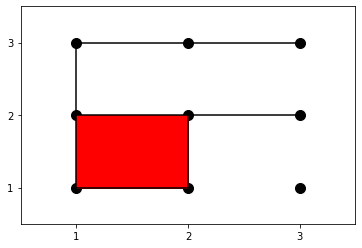

In [ ]:
print(alpha_beta_search(test1))
print_board(test1)

{'move': ('h', 1, 1), 'value': 1}
Results:
         -1: 0
          1: 1


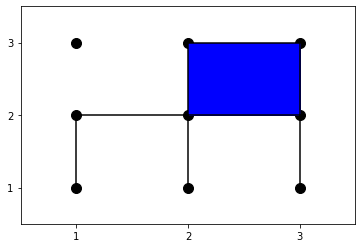

In [ ]:
print(alpha_beta_search(test2))
print_board(test2)

{'move': ('v', 2, 3), 'value': 1}
Results:
         -1: 0
          1: 0


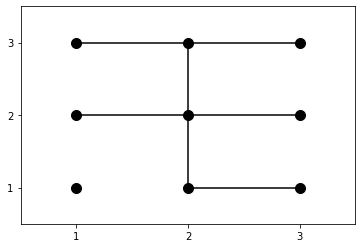

In [ ]:
print(alpha_beta_search(test3))
print_board(test3)

{'move': ('v', 2, 2), 'value': 1}
Results:
         -1: 0
          1: 1


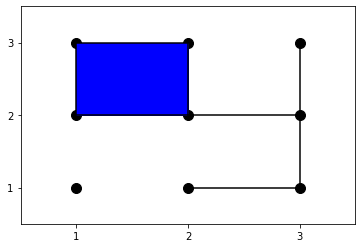

In [ ]:
print(alpha_beta_search(test4))
print_board(test4)

{'move': ('h', 2, 2), 'value': 1}
Results:
         -1: 2
          1: 0


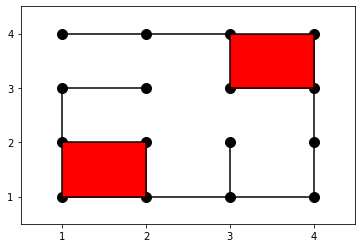

In [ ]:
print(alpha_beta_search(test5))
print_board(test5)

In [ ]:
# ~2:40 min
print(alpha_beta_search(test6))
print_board(test6)

{'move': ('h', 2, 2), 'value': -1}
Results:
         -1: 1
          1: 2


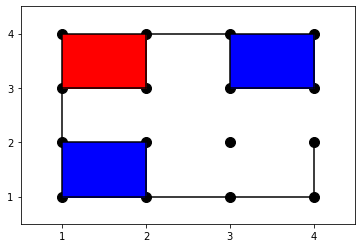

In [ ]:
print(alpha_beta_search(test7))
print_board(test7)

Results:
         -1: 0
          1: 0


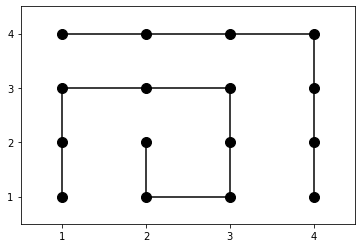

In [ ]:
print_board(test8)

{'move': ('h', 2, 2), 'value': 1}
Results:
         -1: 0
          1: 0


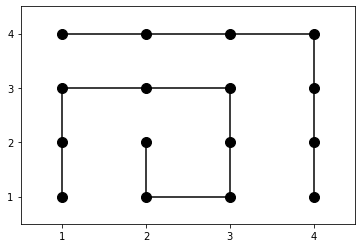

In [ ]:
print(alpha_beta_search(test8))
print_board(test8)

### Times to make a move

How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

In [ ]:
import time

time3x3 = 0
for i in range(10):
    start = time.time()
    alpha_beta_search(empty3())
    end = time.time()
    time3x3 += (end - start)

time3x3 /= 10
print('Average Time: ', time3x3)

Average Time:  4.031449961662292


In [ ]:
# 4x4 Board
# start = time.time()
# alpha_beta_search(empty4())
# end = time.time()
# time4x4 = (end - start)
# print('Average Time: ', time4x4)

It takes an average of about 4 seconds to make the first move on an empty 3x3 board.<br/>
However, it takes longer than 60 minutes to make the first move on an empty 4x4 board. Therefore, the largest board it can solve from the beginning is a 3x3 board.

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

There are a couple of possible strategies for Move Ordering. I will modify the Alpha Beta Search algorithm so it accepts a Move Ordering strategy as a parameter. The default will be no sorting on the actions. I will add three methods for sorting the possible moves: closing box when possible, avoiding making the third side on a box, randomizing the order.

In [ ]:
DEBUG = 0
DEPTH = 0

def alpha_beta_search(state, player=1, sort=None):
    global DEBUG, DEPTH
    state = state.copy()
    
    val, move = max_value(state, player, -np.inf, np.inf, sort)
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

def max_value(state, player, alpha, beta, prevAction=None, sort=None):
    global DEBUG, DEPTH
    if DEBUG >= 1: print('Depth: ', DEPTH)
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = -np.inf
    best_move = None
    
    if closed_box(state, prevAction):
        if DEBUG >= 2: print_board(state)
        v2, action2 = min_value(state, -player, alpha, beta, prevAction=None, sort=sort)
        if v2 > v:
            v = v2
            best_move = None
            alpha = max(alpha, v)
        if v >= beta:
            return v, best_move
        alpha = max(alpha, v)
    else:
        # Sort actions based on Move Ordering
        moves = sorted(actions(state), key=sort)
        for action in moves:
            if DEBUG >= 2: print_board(state)
            v2, action2 = min_value(result(state, player, action), -player, alpha, beta, prevAction=action, sort=sort)
            if DEBUG >= 1: print('Max: ', v2)
            if v2 > v:
                v = v2
                best_move = action
                alpha = max(alpha, v)
            if v >= beta:
                return v, best_move
            alpha = max(alpha, v)
        
    DEPTH += 1

    return v, best_move

def min_value(state, player, alpha, beta, prevAction=None, sort=None):
    global DEBUG, DEPTH
    if DEBUG >= 1: print('Depth: ', DEPTH)
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = np.inf
    best_move = None
    
    if closed_box(state, prevAction):
        if DEBUG >= 2: print_board(state)
        v2, action2 = max_value(state, -player, alpha, beta, prevAction=None, sort=sort)
        if v2 < v:
                v = v2
                best_move = None
                beta = min(beta, v)
        if v <= alpha:
            return v, best_move
        beta = min(beta, v)
    else:
        # Sort actions based on Move Ordering
        moves = sorted(actions(state), key=sort)
        for action in moves:
            if DEBUG >= 2: print_board(state)
            v2, action2 = max_value(result(state, player, action), -player, alpha, beta, prevAction=action, sort=sort)
            if DEBUG >= 1: print('Min: ', v2)
            if v2 < v:
                v = v2
                best_move = action
                beta = min(beta, v)
            if v <= alpha:
                return v, best_move
            beta = min(beta, v)
    
    DEPTH += 1
    
    return v, best_move

In [ ]:
# Making a 3-sided box is bad
def creates_3_sided_box(actions, state=None):
    badList = []
    goodList = []
    
    
    
    # Check all cases of creating a 3-sided box
    for action in actions:
        if action != 'n' and action != 'm' and type(action) != int and (action[0] == 'h' or action[0] == 'v'):
            # Case 1
            if ('v', action[1], action[2]+1) in state and ('v', action[1], action[2]) in state:
                # Add action to bad list
                badList.append(action)
            # Case 2
            elif ('v', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state:
                badList.append(action)
            # Case 3
            elif ('h', action[1], action[2]-1) in state and ('v', action[1], action[2]-1) in state:
                badList.append(action)
            # Case 4
            elif ('h', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]) in state:
                badList.append(action)
            # Case 5
            elif ('h', action[1], action[2]) in state and ('h', action[1]-1, action[2]) in state:
                badList.append(action)
            # Case 6
            elif ('h', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
                badList.append(action)
            # Case 7
            elif ('h', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state:
                badList.append(action)
            # Case 8
            elif ('h', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state:
                badList.append(action)
            # Case 9
            elif ('v', action[1], action[2]) in state and ('h', action[1]-1, action[2]) in state:
                badList.append(action)
            # Case 10
            elif ('v', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
                badList.append(action)
            # Case 11
            elif ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
                badList.append(action)
            # Case 12
            elif ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
                badList.append(action)
        
            # If it doesn't create a 3-sided box, add it to good list
            else:
                goodList.append(action)
    # Append bad list to end of goodlist
    return goodList.append(badList)

In [ ]:
import random

# Closing a box is a good thing
def close_box_sort(actions, state=None):
    return sorted(actions, key=lambda x: closes_box(test1, x))

def avoid_3_sided_box_sort(actions, state=None):
    return sorted(actions, key=lambda x: creates_3_sided_box(test1, x))

# Random Order
def random_sort(actions, state=None):
    return random.sample(actions, len(actions))

We will be testing the times it takes each Move Ordering to make a move in Test6 as it takes approximately 2 minutes to run without any Move Ordering.

### Running Times

In [ ]:
import time

# ~4:30 minutes
start = time.time()
alpha_beta_search(test6)
end = time.time()
none_time = end - start

In [ ]:
# ~4:30 minutes
start = time.time()
alpha_beta_search(test6, sort=close_box_sort)
end = time.time()
close_box_time = end - start

In [ ]:
# ~4:30 minutes
start = time.time()
alpha_beta_search(test6, sort=avoid_3_sided_box_sort)
end = time.time()
avoid_3_time = end - start

In [ ]:
# ~4:30 minutes
start = time.time()
alpha_beta_search(test6, sort=random_sort)
end = time.time()
random_time = end - start

### Time Table

In [ ]:
import pandas as pd

table = pd.DataFrame({
'No Sorting': [none_time, none_time/60],
'Closing Boxes': [close_box_time, close_box_time/60],
'Avoiding 3 Sided': [avoid_3_time, avoid_3_time/60],
'Random': [random_time, random_time/60]
}, index=['Seconds', 'Minutes'])
table

,No Sorting,Closing Boxes,Avoiding 3 Sided,Random
Seconds,267.731961,269.138656,270.343750,266.076901
Minutes,4.462199,4.485644,4.505729,4.434615


As the table shows, the Move Orderings make no difference as the times are very similar to each other. So we will keep with the original algorithm where there is no Move Ordering.

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

A good strategy is to implement a Reflex-Based Agent and add some lines until the board is sufficiently filled. Then, we can switch back to Alpha Beta Pruning.<br/>
The simple reflex agent looks at the percept, the whole board and all lines already drawn, and draws a new line aiming to close a box. If that is not possible, it will draw the first line that that prevents the opponent from closing one (avoids creating a 3-sided box). If that is also not possible, meaning the next move would unquestionably allow the opponent to close a box, the agent will pick a random line.

In [ ]:
def reflex_agent(state, player=1):
    
    # If an action closes a box, choose that one
    for action in actions(state):
        if closes_box(state, action):
            return action
    
    # If an action does not create a 3-sided box, choose that one
    for action in actions(state):
        if not creates_3_sided_box(state, action):
            return action
    
    # Return random action if all will create a 3-sided box
    return random.choice(actions(state))

In [ ]:
DEBUG = -1
DEPTH = 0

def alpha_beta_search_new(state, player=1):
    global DEBUG, DEPTH
    state = state.copy()
    
    # If the board is less than 50% filled, use Reflex Agent
    totalLines = ((state['n']-1) * 2) * ((state['m']-1) * 2)
    linesDrawn = 0
    
    for line in state:
        if line != 'n' and line != 'm' and type(line) != int:
            linesDrawn += 1
    
    if linesDrawn / totalLines < 0.50:
        # Choose a random line
        return reflex_agent(state)
    
    val, move = max_value(state, player, -np.inf, np.inf)
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

# def max_value(state, player, alpha, beta, prevAction=None):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, player), None
    
#     v = -np.inf
#     best_move = None
    
#     if closed_box(state, prevAction):
#         if DEBUG >= 2: print_board(state)
#         v2, action2 = min_value(state, -player, alpha, beta, None)
#         if v2 > v:
#             v = v2
#             best_move = None
#             alpha = max(alpha, v)
#         if v >= beta:
#             return v, best_move
#         alpha = max(alpha, v)
#     else:
#         for action in actions(state):
#             if DEBUG >= 2: print_board(state)
#             v2, action2 = min_value(result(state, player, action), -player, alpha, beta, action)
#             if DEBUG >= 1: print('Max: ', v2)
#             if v2 > v:
#                 v = v2
#                 best_move = action
#                 alpha = max(alpha, v)
#             if v >= beta:
#                 return v, best_move
#             alpha = max(alpha, v)
        
#     DEPTH += 1

#     return v, best_move

# def min_value(state, player, alpha, beta, prevAction=None):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, player), None
    
#     v = np.inf
#     best_move = None
    
#     if closed_box(state, prevAction):
#         if DEBUG >= 2: print_board(state)
#         v2, action2 = max_value(state, -player, alpha, beta, None)
#         if v2 < v:
#                 v = v2
#                 best_move = None
#                 beta = min(beta, v)
#         if v <= alpha:
#             return v, best_move
#         beta = min(beta, v)
#     else:
#         for action in actions(state):
#             if DEBUG >= 2: print_board(state)
#             v2, action2 = max_value(result(state, player, action), -player, alpha, beta, action)
#             if DEBUG >= 1: print('Min: ', v2)
#             if v2 < v:
#                 v = v2
#                 best_move = action
#                 beta = min(beta, v)
#             if v <= alpha:
#                 return v, best_move
#             beta = min(beta, v)
    
#     DEPTH += 1
    
#     return v, best_move

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
import time

# Play reflex agent to fill lines until 50% is completed
def alpha_beta_search50(state, player=1):
    global DEBUG, DEPTH
    state = state.copy()
    
    # If the board is less than 25% filled, use Reflex Agent
    totalLines = ((state['n']-1) * 2) * ((state['m']-1) * 2)
    linesDrawn = 0
    
    for line in state:
        if line != 'n' and line != 'm' and type(line) != int:
            linesDrawn += 1
    
    if linesDrawn / totalLines < 0.50:
        # Choose a random line
        return reflex_agent(state)
    
    val, move = max_value(state, player, -np.inf, np.inf)
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

start = time.time()
results50_50 = play(alpha_beta_search50, random_player, N=50, size=4)
end = time.time()
time50_50 = end - start

start = time.time()
results50_100 = play(alpha_beta_search50, random_player, N=100, size=4)
end = time.time()
time50_100 = end - start

start = time.time()
results50_200 = play(alpha_beta_search50, random_player, N=200, size=4)
end = time.time()
time50_200 = end - start
# ~1:30 min

In [ ]:
# Play reflex agent to fill lines until 75% is completed
def alpha_beta_search75(state, player=1):
    global DEBUG, DEPTH
    state = state.copy()
    
    # If the board is less than 25% filled, use Reflex Agent
    totalLines = ((state['n']-1) * 2) * ((state['m']-1) * 2)
    linesDrawn = 0
    
    for line in state:
        if line != 'n' and line != 'm' and type(line) != int:
            linesDrawn += 1
    
    if linesDrawn / totalLines < 0.75:
        # Choose a random line
        return reflex_agent(state)
    
    val, move = max_value(state, player, -np.inf, np.inf)
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

start = time.time()
results75_50 = play(alpha_beta_search75, random_player, N=50, size=4)
end = time.time()
time75_50 = end - start

start = time.time()
results75_100 = play(alpha_beta_search75, random_player, N=100, size=4)
end = time.time()
time75_100 = end - start

start = time.time()
results75_200 = play(alpha_beta_search75, random_player, N=200, size=4)
end = time.time()
time75_200 = end - start

In [ ]:
import pandas as pd

wins50 = results50_50[1] + results50_100[1] + results50_200[1]
losses50 = results50_50[-1] + results50_100[-1] + results50_200[-1]
ratio50 = wins50 / 350.0
wins75 = results75_50[1] + results75_100[1] + results75_200[1]
losses75 = results75_50[-1] + results75_100[-1] + results75_200[-1]
ratio75 = wins75 / 350.0

scores_alpha_beta = pd.DataFrame({
'win': [wins50, wins75],
'loss': [losses50, losses75],
'win/loss Ratio': [ratio50, ratio75],
'50 Plays Time': [time50_50, time75_50],
'100 Plays Time:': [time50_100, time75_100],
'200 Plays Time:': [time50_200, time75_200]
}, index=['50%', '75%'])

scores_alpha_beta

,win,loss,win/loss Ratio,50 Plays Time,100 Plays Time:,200 Plays Time:
50%,344,6,0.982857,11.832716,25.344842,52.578901
75%,345,5,0.985714,0.081822,0.144747,0.334093


The table above shows how playing the Reflex Agent until 50% or 75% of the board is filled compare to each other.<br/>
Because of the nature of the Reflex Agent, which does not guarantee the optimal play, the agent does not win every single game. However, by starting out with the Reflex Agent, the time is exponentially decreased. When trying to run the Reflex Agent up to 25% of the board, the time for only 50 plays took way to long and did not finish running under 10 minutes.<br/>
Moreover, the differences in the win/loss ratios for both agents are incredibly similar. However, there is a major difference in the running times. For this reason, implementing the Reflex Agent up to 75% of the board seems to be the best move as the game will finish much faster and the Alpha Beta Search will return similar results.

## Task 4: Heuristic Alpha-Beta Tree Search [30 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

A simple heuristic to the Dots and Boxes game is checking which player has the most points, or most boxes, at a certain point.

In [18]:
def eval_fun(state, player=1):
    """heuristic for utility of state. Returns score for a node:
    1. For terminal states it returns the utility. 
    2. For non-terminal states, it calculates who is winning at that state. Returns 1 if player is winning,
    0 if it is a draw, and -1 if the opponent is winning.
    
    Function Returns: heuistic value, terminal?"""
    
    # Check how many boxes are left, how many you have and the opponent has
    
    # terminal state?
    u = utility(state, player)
    if u is not None: 
        return u, True
    
    playerPoints = 0
    opponentPoints = 0
    for dots in state:
        if dots != 'n' and dots != 'm' and dots != -1 and dots != 1:
            if len(dots) == 2:
                if state[dots] == player:
                    playerPoints += 1
                elif state[dots] == -player:
                    opponentPoints += 1

    if playerPoints > opponentPoints:
        return 1, False
    elif playerPoints < opponentPoints:
        return -1, False
    elif playerPoints == opponentPoints:
        return 0, False

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [20]:
import numpy as np

DEBUG = 1
DEPTH = 0

def alpha_beta_cutoff(state, player=1, cutoff=None):
    global DEBUG, COUNT
    COUNT = 0
    state = state.copy()
    
    val, move = max_value_co(state, player, -np.inf, np.inf, 0, cutoff)
    
    if DEBUG >= 1: print(f"Number of nodes searched (cutoff = {cutoff}): {COUNT}") 
    
    if DEBUG >= 0: return {'move': move, 'value': val}
    else: return move

def max_value_co(state, player, alpha, beta, depth, cutoff, prevAction=None):
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal): 
        if(terminal): 
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at Depth: {depth}, Terminal: {terminal}, Values: {v} [{alpha}, {beta}], Cutoff: {cutoff}" )
        
        return v, None
    
    v, move = -np.inf, None
    
    if closed_box(state, prevAction):        
        v2, action2 = min_value_co(state, -player, alpha, beta, depth + 1, cutoff, prevAction=None)
        if v2 > v:
            v, move = v2, None
            alpha = max(alpha, v)
        if v >= beta: return v, move
        
    else:
        for action in actions(state):
            v2, action2 = min_value_co(result(state, player, action), -player, alpha, beta, depth + 1, cutoff, prevAction=action)
            if v2 > v:
                v, move = v2, action
                alpha = max(alpha, v)
            if v >= beta: return v, move

    return v, move

def min_value_co(state, player, alpha, beta, depth, cutoff, prevAction=None):
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal): 
        if(terminal): 
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at Depth: {depth}, Terminal: {terminal}, Values: {v} [{alpha}, {beta}], Cutoff: {cutoff}" ) 
        return v, None
    
    v, move = +np.inf, None
    
    if closed_box(state, prevAction):
        # if DEBUG >= 2: print_board(state)
        
        v2, action2 = max_value_co(state, -player, alpha, beta, depth + 1, cutoff, prevAction=None)
        if v2 < v:
            v, move = v2, None
            beta = min(beta, v)
        if v <= alpha: return v, move
    else:
        for action in actions(state):
            # if DEBUG >= 2: print_board(state)
            
            v2, action2 = max_value_co(result(state, player, action), -player, alpha, beta, depth + 1, cutoff, prevAction=action)
            if v2 < v:
                v, move = v2, action
                beta = min(beta, v)
            if v <= alpha: return v, move
    
    return v, move

### Cutoff Value Experiments

In [ ]:
break

Number of nodes searched (cutoff = 5): 12673


{'move': ('h', 1, 1), 'value': 0}

CPU times: total: 62.5 ms
Wall time: 56 ms
Results:
         -1: 0
          1: 0


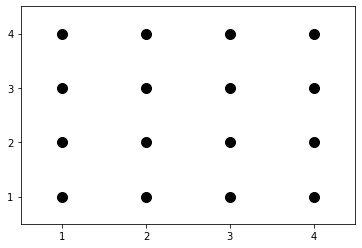

In [21]:
%time display(alpha_beta_cutoff(empty4(), cutoff=5))
print_board(empty4())

Results:
         -1: 0
          1: 0


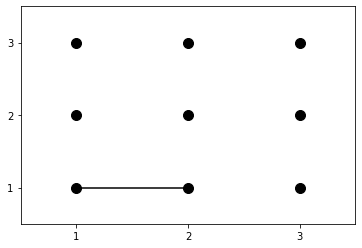

In [ ]:
second = empty3()
draw_line(second, 'h', 1, 1, 1)
print_board(second)

In [ ]:
%time display(alpha_beta_search(second))

Number of nodes searched: 160097


{'move': ('h', 1, 2), 'value': -1}

CPU times: total: 2.03 s
Wall time: 2.11 s


In [ ]:
%time display(alpha_beta_search(empty3()))

Number of nodes searched: 581211


{'move': ('h', 1, 1), 'value': -1}

CPU times: total: 6.75 s
Wall time: 6.9 s


Number of nodes searched (cutoff = None): 581211


{'move': ('h', 1, 1), 'value': -1}

CPU times: total: 8 s
Wall time: 8.13 s
Results:
         -1: 0
          1: 0


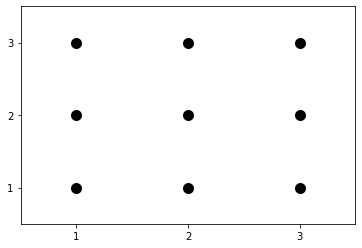

In [23]:
%time display(alpha_beta_cutoff(empty3()))
print_board(empty3())

### Experiments with Boards

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

Number of nodes searched (cutoff = 4): 31
{'move': ('v', 3, 2), 'value': 1}
Results:
         -1: 1
          1: 0


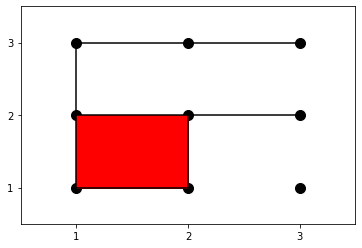

In [24]:
print(alpha_beta_cutoff(test1, cutoff=4))
print_board(test1)

Number of nodes searched (cutoff = None): 45
{'move': ('h', 1, 1), 'value': 1}
Results:
         -1: 0
          1: 1


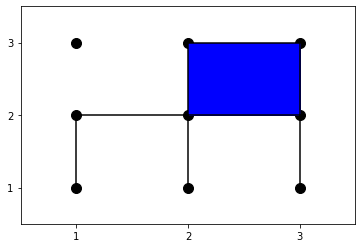

In [26]:
print(alpha_beta_cutoff(test2, cutoff=4))
print_board(test2)

{'move': ('v', 2, 3), 'value': 1}
Results:
         -1: 0
          1: 0


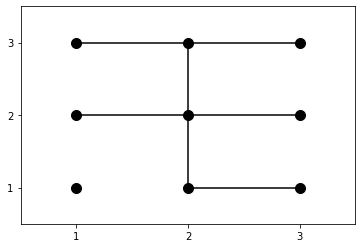

In [ ]:
print(alpha_beta_cutoff(test3))
print_board(test3)

{'move': ('v', 2, 2), 'value': 1}
Results:
         -1: 0
          1: 1


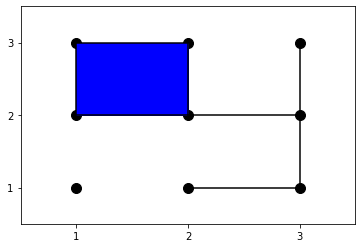

In [ ]:
print(alpha_beta_cutoff(test4))
print_board(test4)

{'move': ('h', 2, 2), 'value': 1}
Results:
         -1: 2
          1: 0


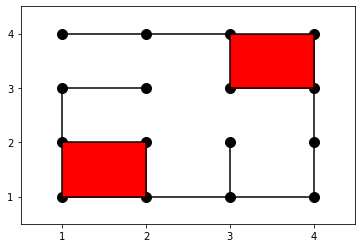

In [ ]:
print(alpha_beta_cutoff(test5))
print_board(test5)

Number of nodes searched (cutoff = 4): 1742
{'move': ('h', 1, 2), 'value': 0}
Results:
         -1: 0
          1: 0


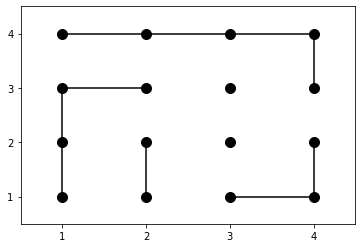

In [27]:
# ~3:00 min - 10,968,752 Nodes searched
print(alpha_beta_cutoff(test6, player=1, cutoff=4))
print_board(test6)

{'move': ('h', 2, 2), 'value': -1}
Results:
         -1: 1
          1: 2


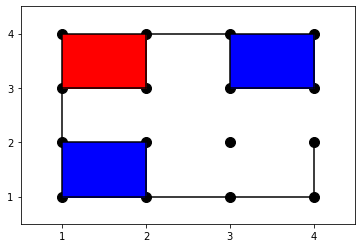

In [ ]:
print(alpha_beta_cutoff(test7))
print_board(test7)

{'move': ('h', 2, 2), 'value': 1}
Results:
         -1: 0
          1: 0


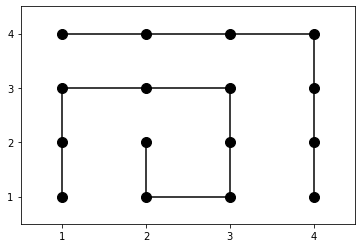

In [ ]:
print(alpha_beta_cutoff(test8))
print_board(test8)

The moves returned from the Heuristic Search are the same ones as the moves from the Alpha Beta Search for the test cases printed above. This indicates that the heuristic is useful in boards of small sizes, like 3x3 and 4x4.

### Times to Make a Move

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
import time

empty3x4 = empty3()
empty3x4['m'] = 4

# Taking too long
start = time.time()
alpha_beta_cutoff(empty3x4)
end = time.time()
time_3x4 = end - start

In [ ]:
empty3x5 = empty3()
empty3x5['m'] = 5

# Taking too long
start = time.time()
alpha_beta_cutoff(empty3x5)
end = time.time()
time_3x5 = end - start

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Do I need a different heuristic function for the opponent?
# If unhashable type: 'dict' -> change DEBUG to -1
print(play(alpha_beta_cutoff, alpha_beta_cutoff, N=1, size=4))

## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

# Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

## Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

### Implementation

In [22]:
def playout(state, action, player = 1):
    """Perfrom a random playout starting with the given action on the fiven board 
    and return the utility of the finished game."""
    state = result(state, player, action)
    current_player = -player
    
    while(True):
        # reached terminal state?
        u = utility(state, player)
        if u is not None: return(u)
        
        # we use a random playout policy
        moves = actions(state)
    
        index = np.random.choice(len(moves))
        a = moves[index]
        
        state = result(state, current_player, a)
        #print(state)
        
        # switch between players
        current_player = -current_player


# Playout for action Horizontal line at 1, 1
board = empty4()
print(playout(board, ('h', 1, 1)))
print(playout(board, ('h', 1, 1)))
print(playout(board, ('h', 1, 1)))
print(playout(board, ('h', 1, 1)))
print(playout(board, ('h', 1, 1)))

-1
-1
1
-1
-1


In [ ]:
def playouts(board, action, player = 1, N = 100):
    """Perform N playouts following the given action for the given board."""
    return [ playout(board, action, player) for i in range(N) ]

u = playouts(board, ('h', 1, 1))
print("Playout results:", u)

print(f"mean utility: {np.mean(u)}")

p_win = sum(np.array(u) == +1)/len(u)
p_loss = sum(np.array(u) == -1)/len(u)
p_draw = sum(np.array(u) == 0)/len(u)
print(f"win probability: {p_win}")
print(f"loss probability: {p_loss}")
print(f"draw probability: {p_draw}")

Playout results: [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1]
mean utility: -0.38
win probability: 0.31
loss probability: 0.69
draw probability: 0.0


In [ ]:
import math

DEBUG = 0

def pmcs(board, N = 100, player=1):
    """Pure Monte Carlo Search. Returns the action that has the largest average utility.
    The N playouts are evenly divided between the possible actions."""
    global DEBUG
    
    acts = actions(board)
    n = math.floor(N/len(acts))
    if DEBUG >= 1: print(f"Actions: {acts} ({n} playouts per action)")
    
    ps = { i : np.mean(playouts(board, i, player, N = n)) for i in acts }
    if DEBUG >= 1: display(ps)
        
    action = max(ps, key=ps.get)
    return action

In [ ]:
board = empty3()
# print_board(board)
%time print(pmcs(board))

print()
print("10000 playouts give a better utility estimate.")
%time print(pmcs(board, N = 10000))

('h', 1, 2)
CPU times: total: 15.6 ms
Wall time: 19.5 ms

10000 playouts give a better utility estimate.
('v', 3, 2)
CPU times: total: 1.75 s
Wall time: 1.75 s


### Test Boards

('v', 3, 2)
CPU times: total: 0 ns
Wall time: 6 ms
Results:
         -1: 1
          1: 0


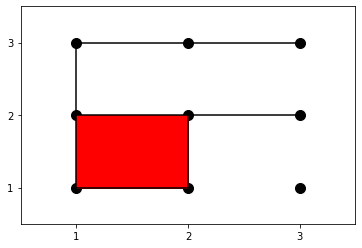

In [ ]:
%time print(pmcs(test1))
print_board(test1)

('h', 1, 1)
CPU times: total: 0 ns
Wall time: 6 ms
Results:
         -1: 0
          1: 1


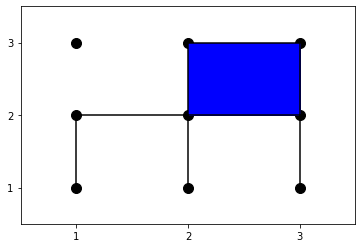

In [ ]:
%time print(pmcs(test2))
print_board(test2)

('v', 2, 3)
CPU times: total: 15.6 ms
Wall time: 13 ms
Results:
         -1: 0
          1: 0


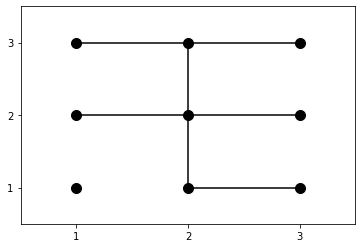

In [ ]:
%time print(pmcs(test3))
print_board(test3)

('v', 2, 2)
CPU times: total: 0 ns
Wall time: 5 ms
Results:
         -1: 0
          1: 1


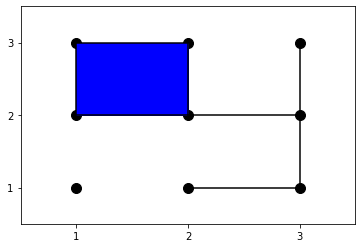

In [ ]:
%time print(pmcs(test4))
print_board(test4)

('h', 2, 3)
CPU times: total: 15.6 ms
Wall time: 14 ms
Results:
         -1: 2
          1: 0


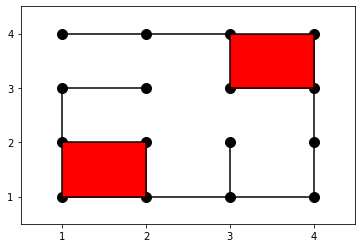

In [ ]:
%time print(pmcs(test5))
print_board(test5)

('h', 2, 3)
CPU times: total: 31.2 ms
Wall time: 28 ms
Results:
         -1: 0
          1: 0


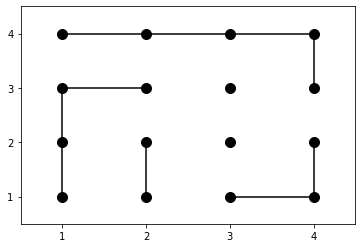

In [ ]:
%time print(pmcs(test6))
print_board(test6)

('h', 2, 2)
CPU times: total: 15.6 ms
Wall time: 14 ms
Results:
         -1: 1
          1: 2


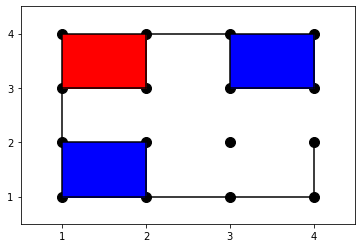

In [ ]:
%time print(pmcs(test7))
print_board(test7)

('h', 2, 2)
CPU times: total: 31.2 ms
Wall time: 28 ms
Results:
         -1: 0
          1: 0


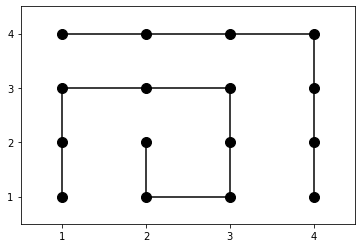

In [ ]:
%time print(pmcs(test8))
print_board(test8)

### Observations

The Pure Monte Carlo Search Algorithm returns the best answer in all of the tests. On test5, the moves returned by PMCS and Alpha-Beta Search are different, but both guarantee a victory.<br/>
PMCS is also incredibly faster than Alpha-Beta Search. The difference in time is more clearly seen in test6 where PMCS finds the best move almost instantly, while the other algorithm takes approximately 2:40 min to do the same task.

## Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

Do simulations in each possible first line and check average utility.

In [ ]:
# Your code/ answer goes here.